# Trabajo Práctico N1. Procesamiento de Imágenes

# Ejercicio 1

Primero estimamos la cantidad de conos como: $\text{Cantidad de Conos} = 150000\frac{conos}{mm^2}\cdot(1.5mm)^2 = 337500 \,\text{conos}$

Luego, el área que ocuparía cada cono sería de: $\text{Área de cono} = \frac{(1,5mm)^2}{337500} = 6.66 \cdot 10^{-12}m^2$ .

Por lo tanto, $\text{Lado de cono} = 2.582 \cdot 10^{-6}m$.

Considerando que la distancia focal de un hojo humano está entre $14mm$ y $17mm$ se tiene:

$\frac{x}{d'} = \frac{h}{d}$

Donde $h$ es el tamaño del lado del cono, $d'$ es la distancia entre el ojo y la pantalla, $x$ es la altura del pixel, $d$ es la distancia focal. 

Se tiene que:

$x = 45.56 \mu m\;\; , d = 17mm$

$x = 55.32 \mu m\;\; , d = 14mm$

# Ejercicio 2

Se tiene 1Mpixel, por lo tanto el CCD tiene 1000x1000 pixeles, dado que es cuadrado. 

$\frac{h'}{1m} = \frac{hpix}{35mm}$

$hpix = \frac{10mm}{1000}$

$h = 285.7\mu$

# Ejercicio 3

# TODO

In [86]:
!pip install opencv-python matplotlib numpy scipy

  Using cached scipy-1.11.1-cp311-cp311-win_amd64.whl (44.0 MB)



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 4

Generamos las 2 imagenes, entendiendo que en una imagen RGB, si R=G=B, el color será negro, gris o blanco.

In [63]:
def generate(background: int, foreground: int):
    gen = np.full((3, 3, 3), (background,)*3, dtype=np.uint8)
    gen[1, 1, :] = (foreground,) *3 
    return gen

(-0.5, 2.5, 2.5, -0.5)

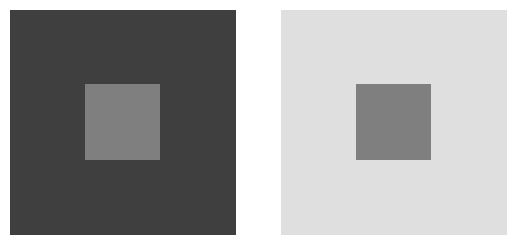

In [66]:
pixel_central = 127

dark = generate(63, pixel_central)
light = generate(223, pixel_central)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dark)
ax2.imshow(light)

ax1.axis('off')
ax2.axis('off')

Ahora probamos con distintos valores de luminancia en el pixel central hasta que empíricamente tengan el mismo brillo. Manteniendo constante el valor del pixel del fondo blanco.

(-0.5, 2.5, 2.5, -0.5)

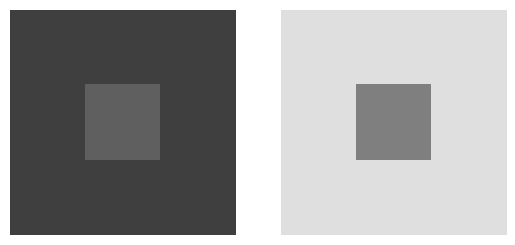

In [74]:
pixel_central = 127
dark_pixel = 95

dark = generate(63, dark_pixel)
light = generate(223, pixel_central)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dark)
ax2.imshow(light)

ax1.axis('off')
ax2.axis('off')

Con un valor de $95$ llegamos al valor que hace que luzcan iguales. Esto se puede explicar con la Ley de Weber, ya que se tuvo que oscurecer el pixel central para que no haga mucho contraste con el fondo y parezca las brillante.

# Ejercicio 5

Text(0.5, 1.0, 'Original')

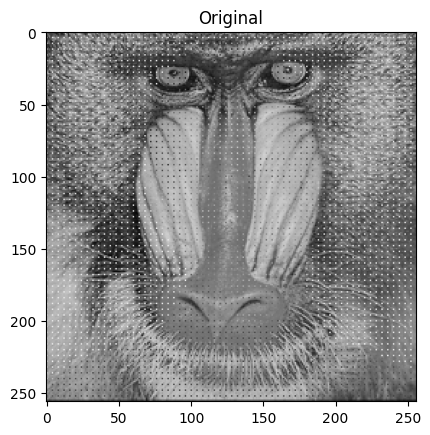

In [75]:
mono_img = cv2.imread("mono.bmp")

plt.imshow(mono_img)
plt.title('Original')

In [16]:
def sample(offset_x: int, offset_y: int):
    return mono_img[offset_x::4, offset_y::4, :]

## Item B


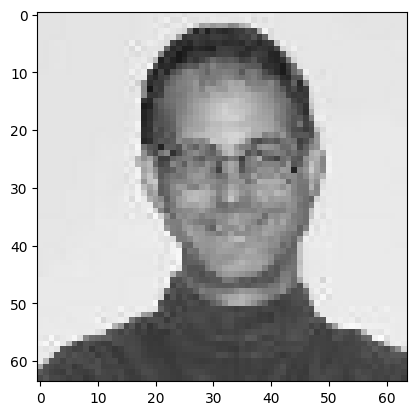

In [78]:
sample_0 = sample(0, 0)
plt.imshow(sample_0)

## Item A

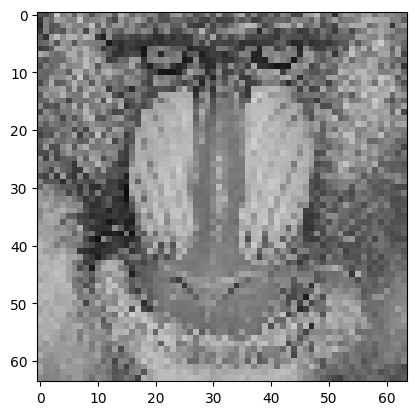

In [79]:
sample_1 = sample(1, 1)
plt.imshow(sample_1)

## Item C

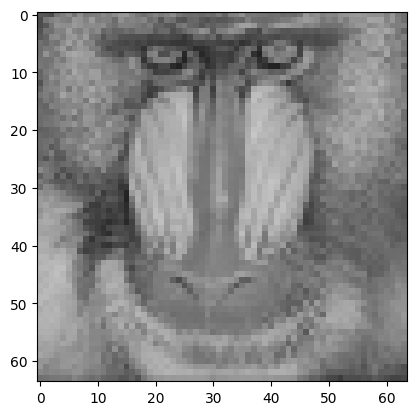

In [96]:
average = sum(sample(x, y).astype(np.int64) for x in range(4) for y in range(4)) / 16
average = average.astype(np.uint8)
plt.imshow(average)

In [20]:
original_size = mono_img.shape[:-1]

def to_3channels(img):
    rgb = np.zeros(img.shape + (3,), dtype=img.dtype)
    rgb[:, :, 0] = img
    rgb[:, :, 1] = img
    rgb[:, :, 2] = img
    return rgb

# TODO: implementar `bilineal_sample` y `bicubic_sample` a manoo

def bilineal_sample(img, x, y):
    # print(x, y)
    x1, y1 = int(np.floor(x)), int(np.floor(y))
    # x2, y2 = int(np.ceil(x)), int(np.ceil(y))
    x2 = x1 + 1
    y2 = y1 + 1

    if x2 >= img.shape[1]:
        x1 -= 1
        x2 -= 1

    if y2 >= img.shape[0]:
        y1 -= 1
        y2 -= 1

    # print(x1, y1, x2, y2)

    # square = np.array([[img[y1, x1], img[y1, x2]], [img[y2, x1], img[y2, x2]]])
    square = img[y1:y2 + 1, x1:x2 + 1]

    res= np.array([[y2 - y, y - y1]]) @ square @ np.array([[x2 - x], [x - x1]])
    return res.astype(np.uint8)

def bilineal(img, new_size):
    height, width = img.shape[:-1]
    original_height, original_width = new_size

    f = np.vectorize(lambda y, x, c: bilineal_sample(img[:,:,int(c)], x * width / original_width, y * height / original_height))

    ours = np.fromfunction(f, new_size + (img.shape[2],))

    # return np.abs(ours.astype(np.int16) - cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR).astype(np.int16)).astype(np.uint8)
    return ours

def bicubic(img):
    return cv2.resize(img, original_size, interpolation=cv2.INTER_CUBIC)

def interpolate(img):
    plt.imshow(bilineal(img, original_size))
    plt.title("Bilineal")
    plt.show()
    plt.imshow(bicubic(img))
    plt.title("Bicubica")
    plt.show()

bilineal(np.array([[[0], [1]], [[0], [0]]]), (2, 2))

array([[[0],
        [1]],

       [[0],
        [0]]], dtype=uint8)

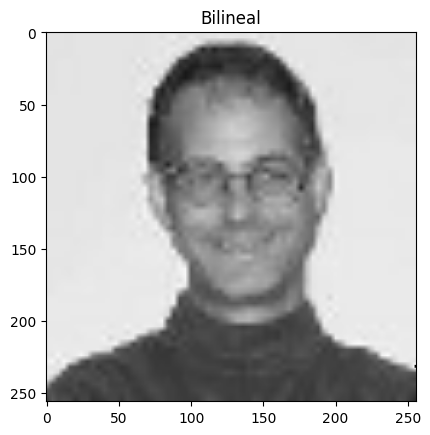

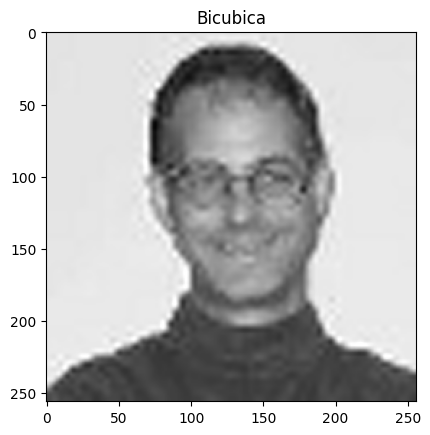

In [97]:
interpolate(sample_0)

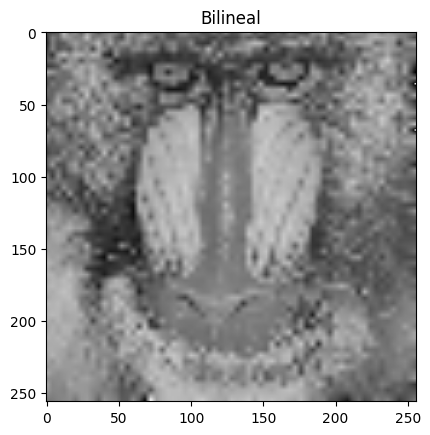

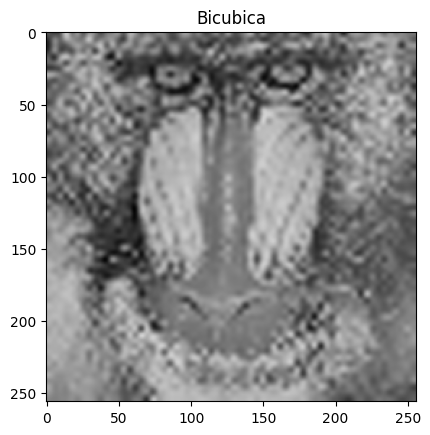

In [98]:
interpolate(sample_1)

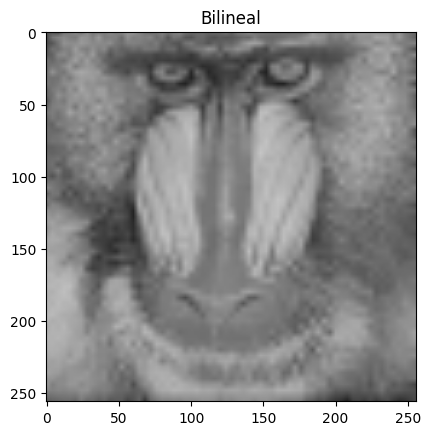

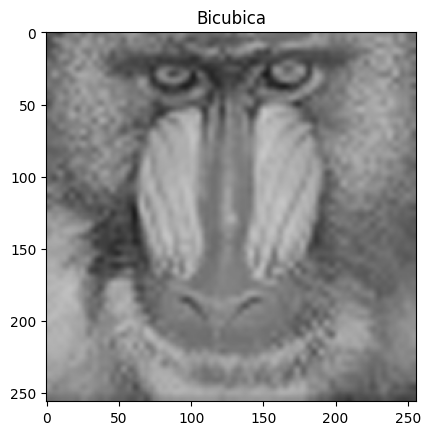

In [23]:
interpolate(average)

In [99]:
from scipy.fft import fft2, fftshift

def plot_FFT2D(sample):
    image_fft = fftshift(fft2(sample[:,:,0]))
    magnitud_spectrum = np.abs(image_fft)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample, cmap='gray')
    plt.title('Imagen original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
    plt.title('Magnitud (log)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


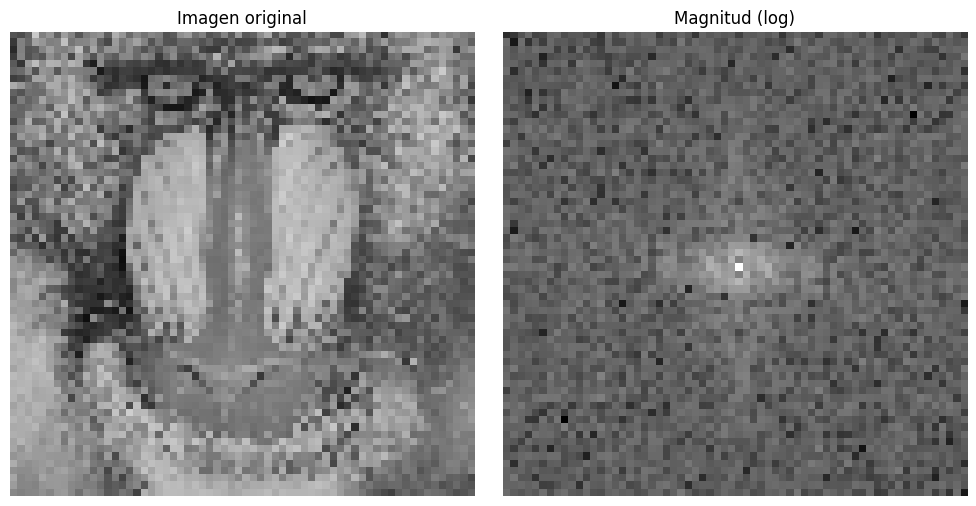

In [100]:
plot_FFT2D(sample_1)

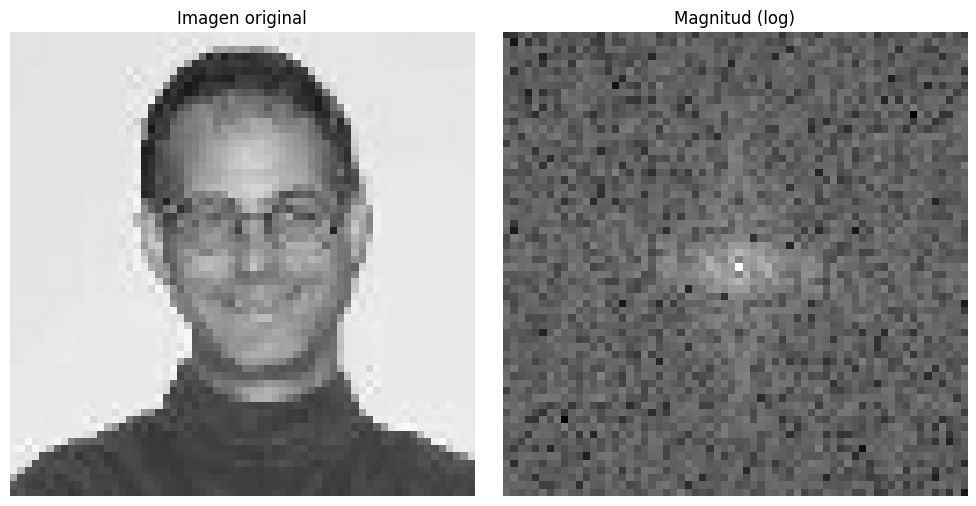

In [101]:
plot_FFT2D(sample_0)

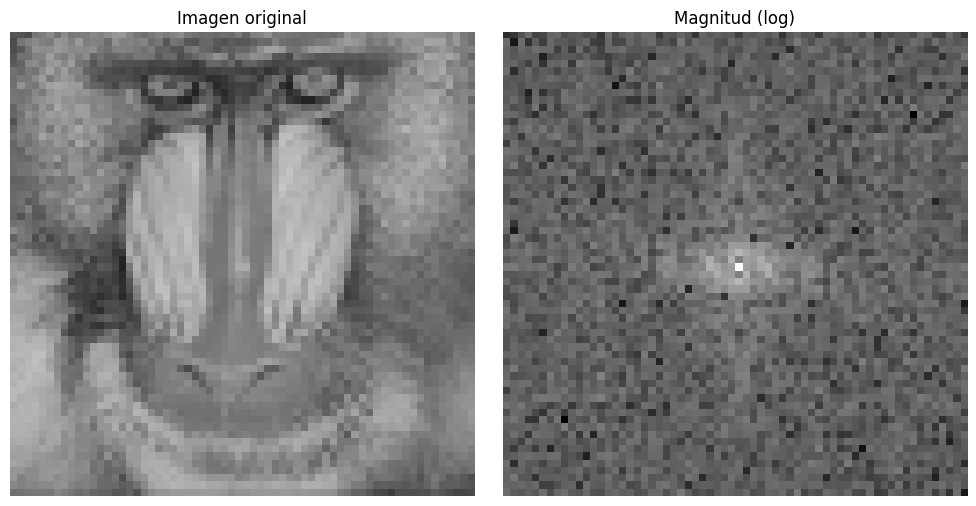

In [102]:
plot_FFT2D(average)